In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.mode.chained_assignment = None 

My motivation for choosing this dataset is that it has the highest concentration of accurate inmate population data, including strata for race and gender across both the inmate and non-incarcerated population. Unfortunately, the data is lacking in several areas. The historical records only go back as far as the 70s if we are truly lucky, while some begin in the 2000s, while others are missing entire columns of data. My hope is to employ some novel techniques in missing data estimation in order to more confidently analyze a more complete data set.

In [115]:
print(MN_data["black_prison_pop"].value_counts().head(5))
print(ND_data["black_prison_pop"].value_counts().head(5))
print(WY_data["black_prison_pop"].value_counts().head(5))

0.0    1027
4.0      80
5.0      57
6.0      45
7.0      32
Name: black_prison_pop, dtype: int64
0.0    891
5.0     13
4.0      7
9.0      6
8.0      5
Name: black_prison_pop, dtype: int64
0.0    114
5.0      6
7.0      5
6.0      4
8.0      3
Name: black_prison_pop, dtype: int64


Initially, I set out to focus on states with small populations, as each individual vote has far more power (by proxy) in the US senate. There are also multiple epidemiological vectors of interest related to this data. What is the economic impact on African-American communities in the sparse Badlands, for example, due to historic inequality? The lack of uniformity in the data set makes questions like these difficult to answer. Above, I have listed the top 5 most common values for "black_prison_pop," a variable which reports the black prison population on a per-county basis in units of $1X10^7$. In Wyoming and North Dakota, we observe an enormous problem- zero is far more frequently represented in the dataset than any other value. The same is even true for Minnesota, a geographically similar state with far more populous urban centers and racial heterogeneity. We can compare that to the figures below, in which we observe fairly populous prisons by using a similar metric, with the disparity particularly glaring in Wyoming.

In [116]:
print(MN_data["total_prison_pop"].value_counts().head(5))
print(ND_data["total_prison_pop"].value_counts().head(5))
print(WY_data["total_prison_pop"].value_counts().head(5))

4.0    98
5.0    92
7.0    76
6.0    74
8.0    53
Name: total_prison_pop, dtype: int64
0.0    289
4.0    119
5.0     87
6.0     67
7.0     37
Name: total_prison_pop, dtype: int64
23.0    9
21.0    7
25.0    7
20.0    6
18.0    6
Name: total_prison_pop, dtype: int64


Further below, I have produced two sets of graphs showing the disparity between the total proportion of the population in prisons, and the proportion of the African-American population that is incarcerated. The data is stratified within each state by county and is time series data across an approximately 25 year period. These states have important distinct features. Alabama is a predominantly rural state with some small urban centers, and a roughly 3:1 ratio of white to African-American citizens. That ratio does not vary significantly throughout the state. Pennsylvania is also a predominantly rural state, but has multiple urban centers with significant suburban sprawl. The ratio of white to African-American citizens in Pennsylvania is approximately 10:1, which means that there are roughly the same number of black Alabamans as black Pennsylvanians, with black Pennsylvanians concentrated much more significantly in urban centers. The same size of the black population with vastly different cultural, structural and geographical differences make these two states ripe for comparison.

In [13]:
AL_data = inc_data.loc[inc_data["state"] == "AL"]
AL_data["county_name"] = AL_data["county_name"].astype(str)


AL_counties = AL_data["county_name"].value_counts().index
AL_data_1 = AL_data[["county_name", "year","total_pop","black_pop_15to64","total_prison_pop","black_prison_pop"]]

In [53]:
AL_data1 = AL_data_1.dropna()

import random

random_index = random.sample(range(0,len(AL_counties)),15)
AL_random = AL_counties[random_index]

In [78]:
PA_data = inc_data.loc[inc_data["state"] == "PA"]
PA_data["county_name"] = PA_data["county_name"].astype(str)
PA_data_1 = PA_data[["county_name", "year","total_pop","black_pop_15to64","total_prison_pop","black_prison_pop"]]
PA_counties = PA_data["county_name"].value_counts().index

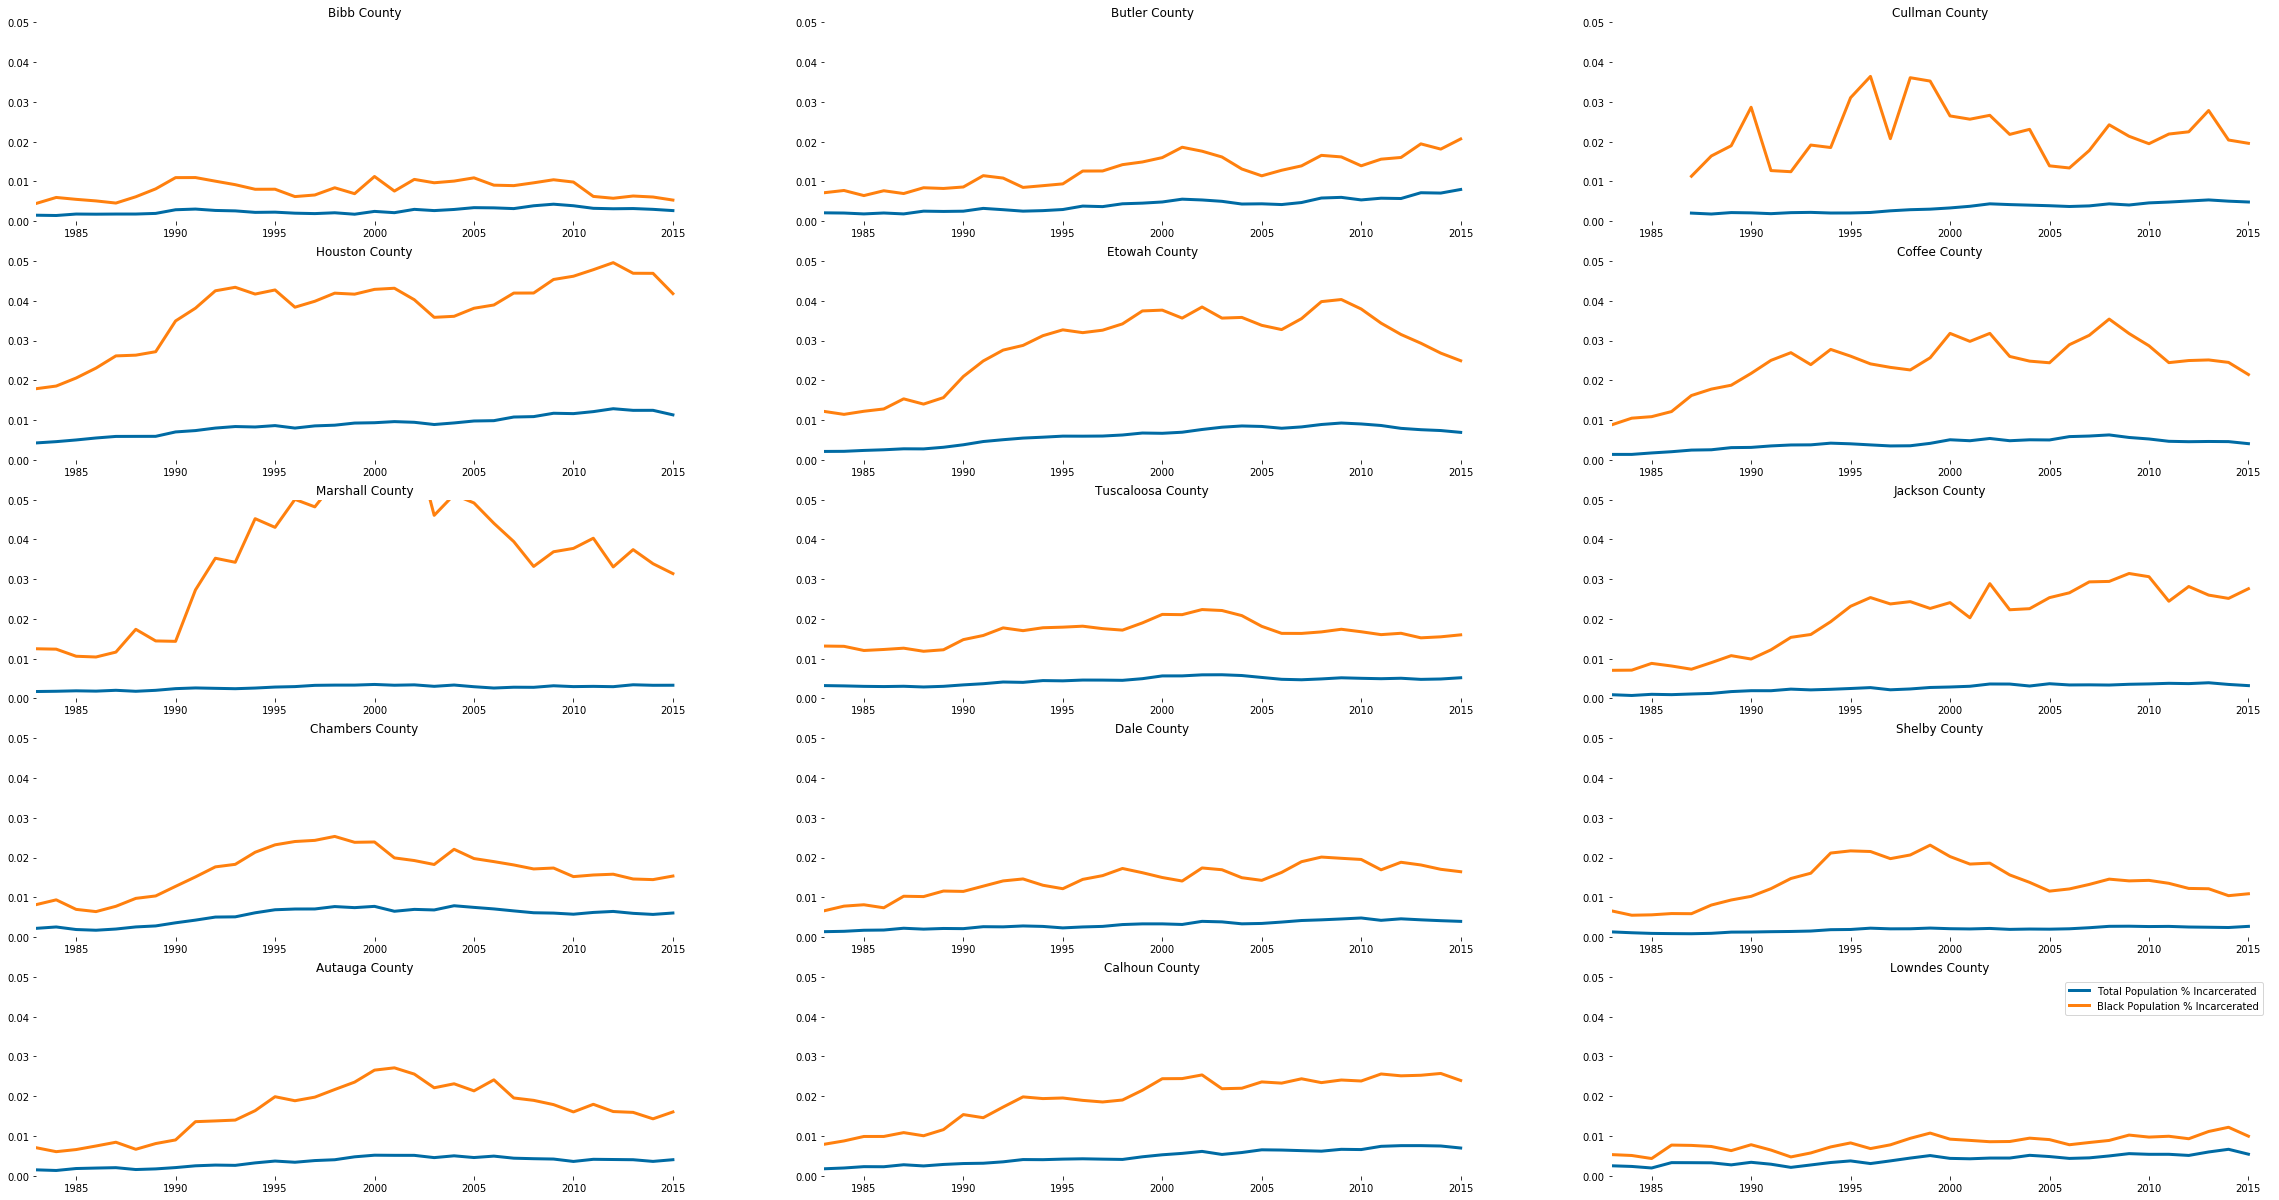

In [59]:
cb_dark_blue = (0/255,107/255,164/255)
cb_orange = (255/255, 128/255, 14/255)
cb_dark_gray = (89/255,89/255,89/255)
cb_yellow = (255/255,188/255,121/255)


def AL_prison_prop(i):
    return AL_data1.loc[AL_data1["county_name"]== AL_random[i],"total_prison_pop"]/AL_data1.loc[AL_data1["county_name"]== AL_random[i],"total_pop"]
def AL_black_prison_prop(i):
    return AL_data1.loc[AL_data1["county_name"]== AL_random[i],"black_prison_pop"]/AL_data1.loc[AL_data1["county_name"]== AL_random[i],"black_pop_15to64"]

fig = plt.figure(figsize= (40,30))

for i in range(15):
    ax = fig.add_subplot(7,3,i + 1)
    ax.plot(AL_data1.loc[AL_data1["county_name"] == AL_random[i],"year"],AL_prison_prop(i),
             c = cb_dark_blue, label = "Total Population % Incarcerated", linewidth = 3)
    ax.plot(AL_data1.loc[AL_data1["county_name"] == AL_random[i],"year"],AL_black_prison_prop(i),
             c = cb_orange, label = "Black Population % Incarcerated", linewidth = 3)
    for key,spine in ax.spines.items():
        spine.set_visible(False)
        
    ax.set_xlim(1983,2016)
    ax.set_ylim(0,0.05)
    ax.set_title(AL_random[i])
    
plt.legend()
fig.savefig("ALproportiongraph.png")

plt.show()

The included dataset has an excellent density of data for Alabama. One of the most common misconceptions about mass incarceration is that there are *more* incarcerated African-Americans than incarcerated whites. Indeed, if we were to simply plot the white prison population vs. the black prison population, we would observe far more white prisoners than African-American prisoners. This is sensible- in Alabama the population is roughly 72 percent white and roughly 27 percent black. In order for the number of black prisoners to exceed the number of white prisoners, a truly inexorable amount of targeted harrassment would have to occur.

In the above plot, the x axis represents years beginning in 1983, and the y-axis ranges from 0 to 5 percent. The orange line represents the proportion of the African-American population in Alabama, while the blue line represents the total population proportion of incarcerated people in Alabama. I randomly sampled 15 of the 63 counties in Alabama to display. There is a clear, overarching trend: the black community is overrepresented in prisons. In Tuscaloosa and Lowndes counties, we observe a similar pattern in how the proportions change, while still observing the differences in proportion. Meanwhile, in counties like Jackson, Coffee, Etowah, Houston, and Marshall, there is an exorbitant difference between the two percentages, with no clear predicted pattern of convergence. 

In [118]:
PA_data1 = PA_data_1.dropna()
PA_counties = PA_data1["county_name"].value_counts().index
PA_counties_most_data = []
for county in PA_counties:
    if len(PA_data1.loc[PA_data1["county_name"]==county]) >= 33:
        PA_counties_most_data.append(county)
        
PA_random  = random.sample(PA_counties_most_data,15)
print(random_PA_counties)

['Snyder County', 'Chester County', 'Montgomery County', 'Sullivan County', 'Lehigh County', 'Dauphin County', 'Carbon County', 'Lebanon County', 'Bucks County', 'Philadelphia County', 'Union County', 'Clarion County', 'Wayne County', 'Warren County', 'Adams County']


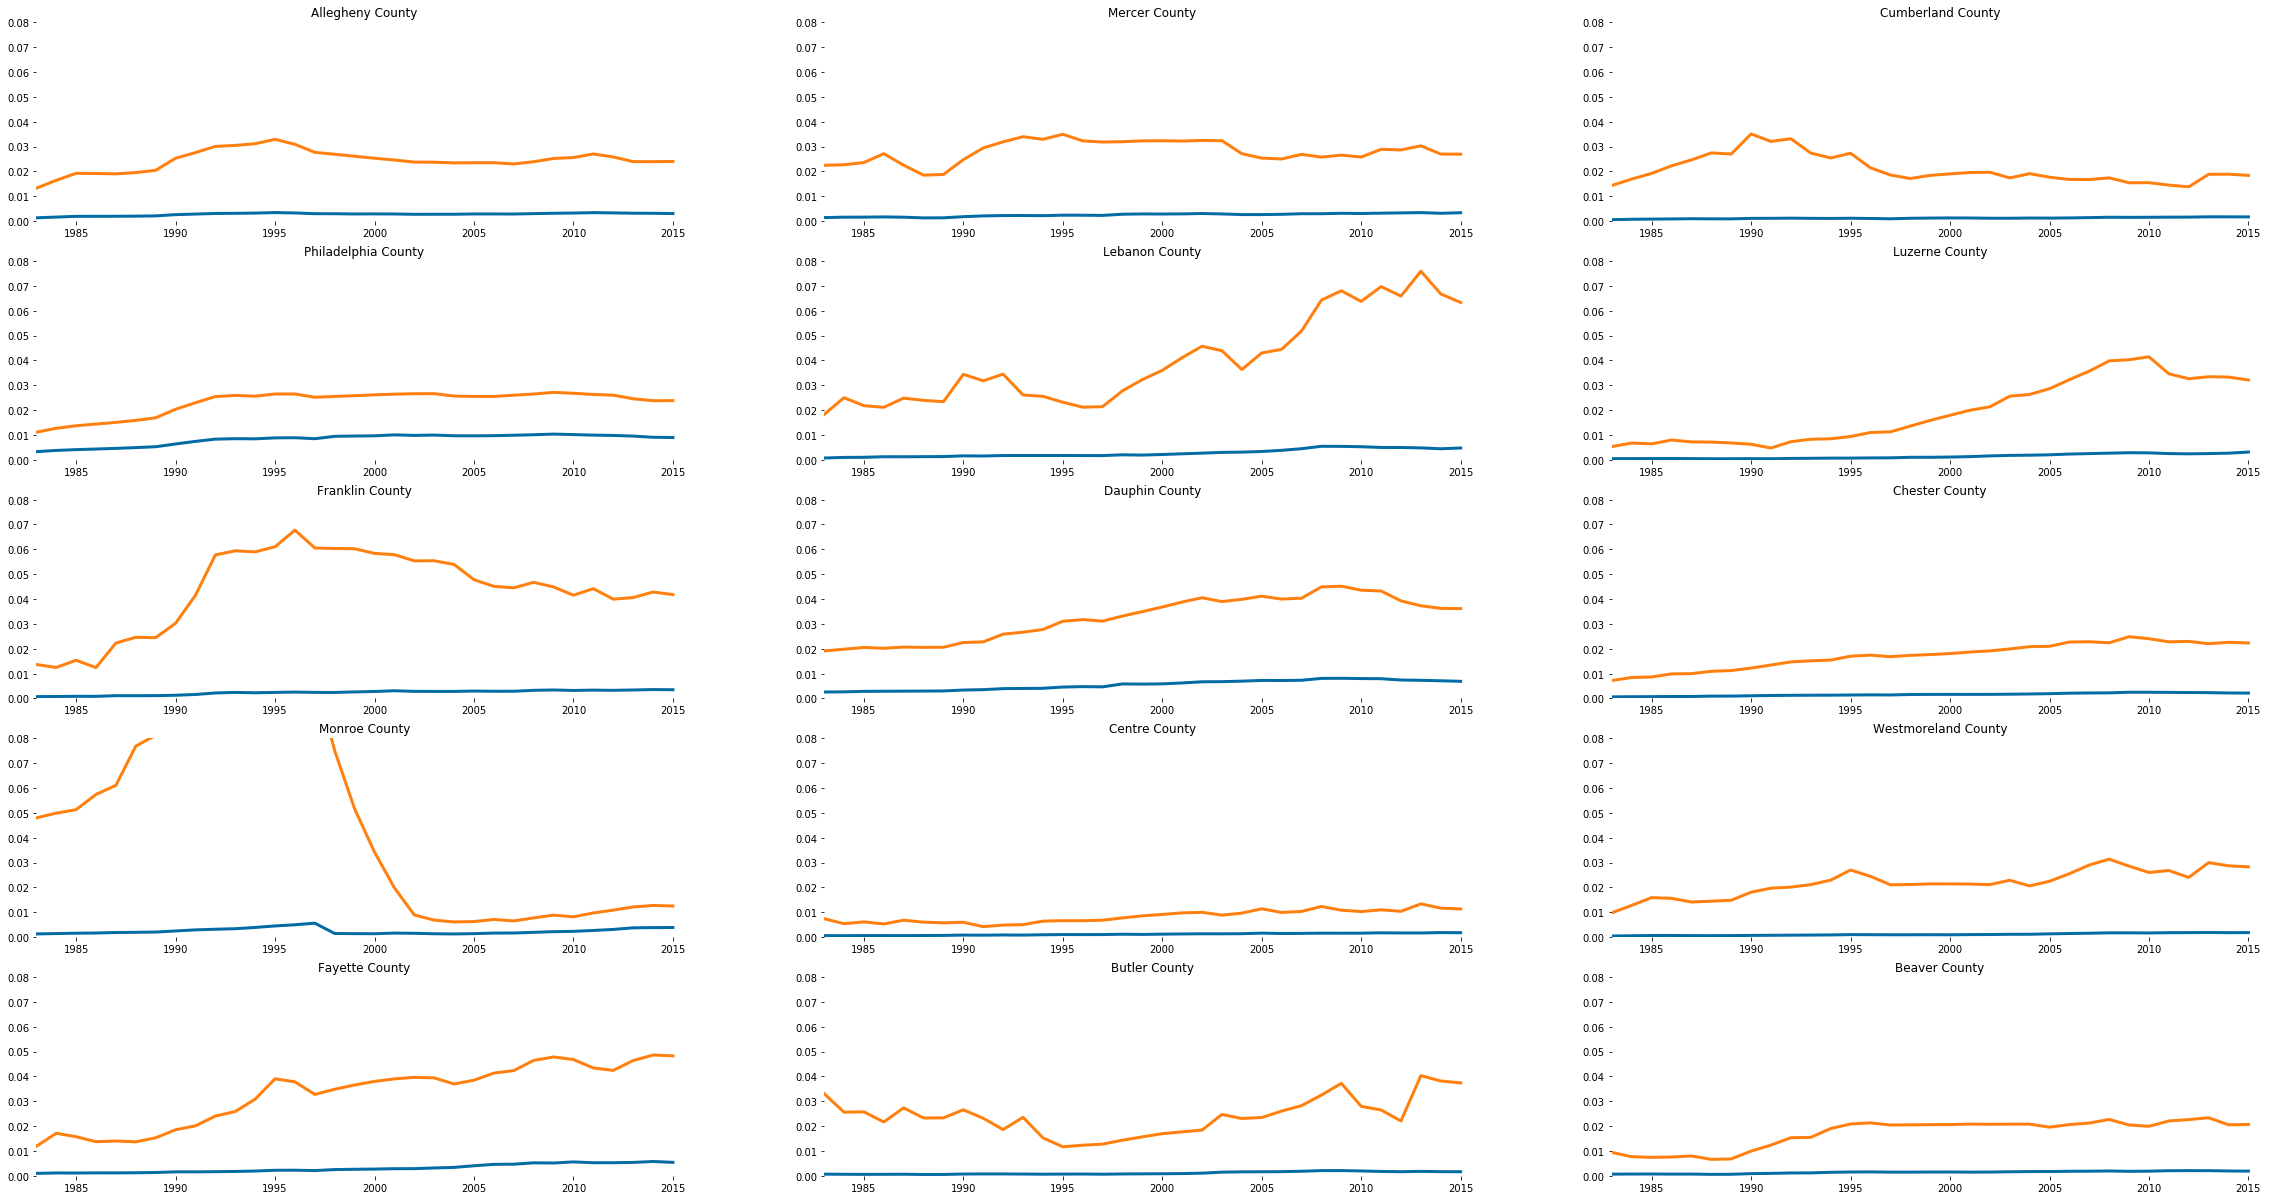

In [119]:
def PA_prison_prop(i):
    return PA_data1.loc[PA_data1["county_name"]== PA_random[i],"total_prison_pop"]/PA_data1.loc[PA_data1["county_name"]== PA_random[i],"total_pop"]
def PA_black_prison_prop(i):
    return PA_data1.loc[PA_data1["county_name"]== PA_random[i],"black_prison_pop"]/PA_data1.loc[PA_data1["county_name"]== PA_random[i],"black_pop_15to64"]

fig = plt.figure(figsize= (40,30))

for i in range(15):
    ax = fig.add_subplot(7,3,i + 1)
    ax.plot(PA_data1.loc[PA_data1["county_name"] == PA_random[i],"year"],PA_prison_prop(i),
             c = cb_dark_blue, label = "Total Population % Incarcerated", linewidth = 3)
    ax.plot(PA_data1.loc[PA_data1["county_name"] == PA_random[i],"year"],PA_black_prison_prop(i),
             c = cb_orange, label = "Black Population % Incarcerated", linewidth = 3)
    for key,spine in ax.spines.items():
        spine.set_visible(False)
        
    ax.set_xlim(1983,2016)
    ax.set_ylim(0,0.08)
    ax.set_title(PA_random[i])
    
fig.savefig("PAproportiongraph.png")

plt.show()

The plot above shows a great deal of the racial heterogeneity in Pennsylvania. It consists of a random sample of the counties in Pennsylvania that had the most historical data to report. Beaver, Westmoreland, Cumberland, Lebanon and Butler counties have an extremely similar trend to the plots from Alabama. These are mostly rural counties with small urban centers, with notable historical racial tension. These cultural and geographic similarities could explain this gap. However,, Allegheny and Philadelphia counties, which contain the two most densely populated urban centers, also show a similar trend with a slightly more muted effect. In other plots we see violent spiking behavior of the black prison population proportion relative to extremely stable and slight linear increases in the general prison population proportion. These are extremely rural counties that are not near any major urban centers, like Fayette, Franklin, and Monroe county. While the Alabama plots had similar features overall due to the relative heterogeneity of the black:white ratio across the state, we see much larger gaps in counties with smaller African-American populations in Pennsylvania.

# Conclusion

Data science is converging to a point in which computational capacity allows machine learning algorithms to overpower traditional parametric estimation. Simply put, traditional techniques for estimating missing data would not ever allow us to fill in the glaring holes in this data set. Of course, it makes sense to seek out data with which we can join this set, and to fill in as many of the gaps as we possibly can. There are pivotal decades of American history missing from this analysis, and the years for which we do have data many not reflect historical trends. It is for this reason that I am beginning this analysis by searching for features that can explain the gaps that we observe. What similarities does rural Alabama have to rural Wyoming, or to rural Pennsylvania, or even Hawaii or Alaska? Are there any features that we can use to train an algorithm to make predictions for what is missing? If there is, we would have a swarth of data that could help explain decades of lower life expectancy, a lack of access to nutritious food, disproportionate suffering from police violence, factors of voter disfranchisement, and economic inequality. 